### EXPLORING EXOPLANETS USING ML

An exoplanet or extrasolar planet, is any planet beyond our solar system. Most of the exoplanets discovered so far are in a relatively small region of the Milky Way. NASA’s Kepler Space Telescope is responsible for finding over 2700 confirmed exoplanets.

Most exoplanets are found through indirect methods: measuring the dimming of a star that happens to have a planet pass in front of it, called the transit method, or monitoring the spectrum of a star for the tell-tale signs of a planet pulling on its star and causing its light to subtly Doppler shift.

This dataset describes the change in the flux(intensity of light) for over 5000 stars. Each star is assigned a binary label 2 and 1 (where 2 - shows that confirmation of an exoplanet orbiting the star)

#### Importing necessary libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

#### Getting the dataset

In [2]:
#Reading the dataset and displaying the first 5 values
traindf = pd.read_csv('/kaggle/input/kepler-labelled-time-series-data/exoTrain.csv')
traindf.head()

LABEL   FLUX.1   FLUX.2   FLUX.3   FLUX.4   FLUX.5   FLUX.6  FLUX.7  \
0      2    93.85    83.81    20.10   -26.98   -39.56  -124.71 -135.18   
1      2   -38.88   -33.83   -58.54   -40.09   -79.31   -72.81  -86.55   
2      2   532.64   535.92   513.73   496.92   456.45   466.00  464.50   
3      2   326.52   347.39   302.35   298.13   317.74   312.70  322.33   
4      2 -1107.21 -1112.59 -1118.95 -1095.10 -1057.55 -1034.48 -998.34   

    FLUX.8  FLUX.9  ...  FLUX.3188  FLUX.3189  FLUX.3190  FLUX.3191  \
0   -96.27  -79.89  ...     -78.07    -102.15    -102.15      25.13   
1   -85.33  -83.97  ...      -3.28     -32.21     -32.21     -24.89   
2   486.39  436.56  ...     -71.69      13.31      13.31     -29.89   
3   311.31  312.42  ...       5.71      -3.73      -3.73      30.05   
4 -1022.71 -989.57  ...    -594.37    -401.66    -401.66    -357.24   

   FLUX.3192  FLUX.3193  FLUX.3194  FLUX.3195  FLUX.3196  FLUX.3197  
0      48.57      92.54      39.32      61.42       5.08     -39.54  
1      -4.86       0.76     -11.70       6.46      16.00      19.93  
2     -20.88       5.06     -11.80     -28.91     -70.02     -96.67  
3      20.03     -12.67      -8.77     -17.31     -17.35      13.98  
4    -443.76    -438.54    -399.71    -384.65    -411.79    -510.54  

[5 rows x 3198 columns]

In [3]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5087 entries, 0 to 5086
Columns: 3198 entries, LABEL to FLUX.3197
dtypes: float64(3197), int64(1)
memory usage: 124.1 MB


In [4]:
#Shape of the training dataset
traindf.shape

(5087, 3198)

#### Summary of the dataset:
We have 5087 stars in this dataset having 3197 flux values (for light intensity - at different time intervals) and 1 column for label(either 1 or 2). These values are captured by the Keppler Space Telescope of NASA

In [5]:
#Check for duplicates with the df
traindf.duplicated().sum()

0

In [6]:
#Checking for missing values and displaying corresponding row
traindf[traindf.isnull().any(axis = 1)]

Empty DataFrame
Columns: [LABEL, FLUX.1, FLUX.2, FLUX.3, FLUX.4, FLUX.5, FLUX.6, FLUX.7, FLUX.8, FLUX.9, FLUX.10, FLUX.11, FLUX.12, FLUX.13, FLUX.14, FLUX.15, FLUX.16, FLUX.17, FLUX.18, FLUX.19, FLUX.20, FLUX.21, FLUX.22, FLUX.23, FLUX.24, FLUX.25, FLUX.26, FLUX.27, FLUX.28, FLUX.29, FLUX.30, FLUX.31, FLUX.32, FLUX.33, FLUX.34, FLUX.35, FLUX.36, FLUX.37, FLUX.38, FLUX.39, FLUX.40, FLUX.41, FLUX.42, FLUX.43, FLUX.44, FLUX.45, FLUX.46, FLUX.47, FLUX.48, FLUX.49, FLUX.50, FLUX.51, FLUX.52, FLUX.53, FLUX.54, FLUX.55, FLUX.56, FLUX.57, FLUX.58, FLUX.59, FLUX.60, FLUX.61, FLUX.62, FLUX.63, FLUX.64, FLUX.65, FLUX.66, FLUX.67, FLUX.68, FLUX.69, FLUX.70, FLUX.71, FLUX.72, FLUX.73, FLUX.74, FLUX.75, FLUX.76, FLUX.77, FLUX.78, FLUX.79, FLUX.80, FLUX.81, FLUX.82, FLUX.83, FLUX.84, FLUX.85, FLUX.86, FLUX.87, FLUX.88, FLUX.89, FLUX.90, FLUX.91, FLUX.92, FLUX.93, FLUX.94, FLUX.95, FLUX.96, FLUX.97, FLUX.98, FLUX.99, ...]
Index: []

[0 rows x 3198 columns]

#### Plotting heatmap for missing values

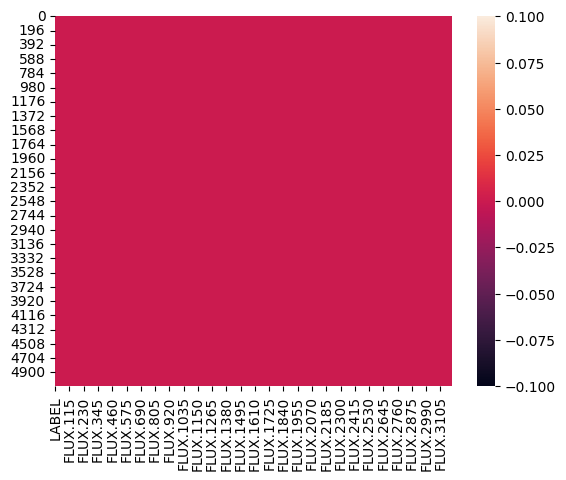

In [7]:
#Displaying null values using seaborn. 
'''In this dataset,there are no null values
The horizontal dashes in the plot would indicate the presence of missing 
values in the respective column'''
sns.heatmap(traindf.isnull())
plt.show()

#### Decoding labels in this dataset

In [8]:
#Check how many labels are present in the df
traindf['LABEL'].unique()

array([2, 1])

In [9]:
#Extract the index for the stars labelled 2 - indicates presence of exoplanet
exoplanet_values = list(traindf[traindf['LABEL']== 2].index)
exoplanet_values

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36]

There are 2 labels in this dataset. Label 2 - shows the presence of an exoplanet orbiting around the star. And Label 1 - shows the star itself. In this dataset, the first 37 entries shows stars having atleast one exoplanet orbiting it.

#### Data Visualizations

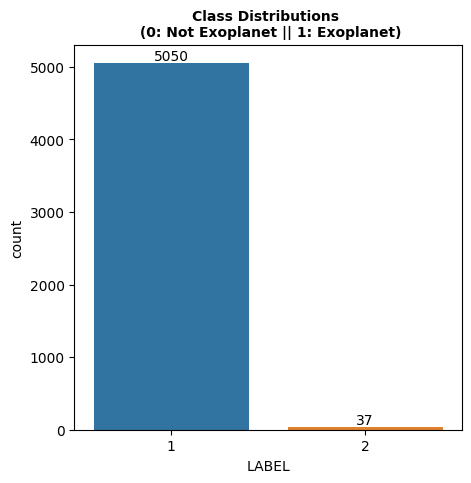

In [10]:
#Visualization - Number of Stars with Confirmed Exoplanets or Not
#Label 1 - Exoplanet Confirmed, Label 0 - Exoplanet Not Confirmed
plt.figure(figsize = (5,5))
plt.title('Class Distributions \n (0: Not Exoplanet || 1: Exoplanet)', fontsize=20,
         font = 'sans serif', weight = 'bold', color = 'black')
ax = sns.countplot(data = traindf, x='LABEL')
ax.bar_label(ax.containers[0])
plt.show()

As can be observed from the countplot, there is a huge imbalance in the dataset with only 37 stars having exoplanets and 5050 stars. 

Replacing the labels in this dataset:
Stars with exoplanets 2 -> 1
Stars with no exoplanets 1 -> 0

In [11]:
traindf = traindf.replace( {"LABEL"  : { 2:1, 1:0}})
traindf.LABEL.unique()

array([1, 0])

#### Plotting the dataframe to get the graph for transit photometry method

In [12]:
#Dropping the label column and also plotting the graph - brightness over time
newdf = traindf.drop(["LABEL"] ,axis = 1)
newdf

FLUX.1   FLUX.2   FLUX.3   FLUX.4   FLUX.5   FLUX.6  FLUX.7   FLUX.8  \
0       93.85    83.81    20.10   -26.98   -39.56  -124.71 -135.18   -96.27   
1      -38.88   -33.83   -58.54   -40.09   -79.31   -72.81  -86.55   -85.33   
2      532.64   535.92   513.73   496.92   456.45   466.00  464.50   486.39   
3      326.52   347.39   302.35   298.13   317.74   312.70  322.33   311.31   
4    -1107.21 -1112.59 -1118.95 -1095.10 -1057.55 -1034.48 -998.34 -1022.71   
...       ...      ...      ...      ...      ...      ...     ...      ...   
5082   -91.91   -92.97   -78.76   -97.33   -68.00   -68.24  -75.48   -49.25   
5083   989.75   891.01   908.53   851.83   755.11   615.78  595.77   458.87   
5084   273.39   278.00   261.73   236.99   280.73   264.90  252.92   254.88   
5085     3.82     2.09    -3.29    -2.88     1.66    -0.75    3.85    -0.03   
5086   323.28   306.36   293.16   287.67   249.89   218.30  188.86   178.93   

      FLUX.9  FLUX.10  ...  FLUX.3188  FLUX.3189  FLUX.3190  FLUX.3191  \
0     -79.89  -160.17  ...     -78.07    -102.15    -102.15      25.13   
1     -83.97   -73.38  ...      -3.28     -32.21     -32.21     -24.89   
2     436.56   484.39  ...     -71.69      13.31      13.31     -29.89   
3     312.42   323.33  ...       5.71      -3.73      -3.73      30.05   
4    -989.57  -970.88  ...    -594.37    -401.66    -401.66    -357.24   
...      ...      ...  ...        ...        ...        ...        ...   
5082  -30.92   -11.88  ...     139.95     147.26     156.95     155.64   
5083  492.84   384.34  ...     -26.50      -4.84     -76.30     -37.84   
5084  237.60   238.51  ...     -26.82     -53.89     -48.71      30.99   
5085    3.28     6.29  ...      10.86      -3.23      -5.10      -4.61   
5086  118.93   130.68  ...      71.19       0.97      55.20      -1.63   

      FLUX.3192  FLUX.3193  FLUX.3194  FLUX.3195  FLUX.3196  FLUX.3197  
0         48.57      92.54      39.32      61.42       5.08     -39.54  
1         -4.86       0.76     -11.70       6.46      16.00      19.93  
2        -20.88       5.06     -11.80     -28.91     -70.02     -96.67  
3         20.03     -12.67      -8.77     -17.31     -17.35      13.98  
4       -443.76    -438.54    -399.71    -384.65    -411.79    -510.54  
...         ...        ...        ...        ...        ...        ...  
5082     156.36     151.75     -24.45     -17.00       3.23      19.28  
5083    -153.83    -136.16      38.03     100.28     -45.64      35.58  
5084      15.96      -3.47      65.73      88.42      79.07      79.43  
5085      -9.82      -1.50      -4.65     -14.55      -6.41      -2.55  
5086      -5.50     -25.33     -41.31     -16.72     -14.09      27.82  

[5087 rows x 3197 columns]

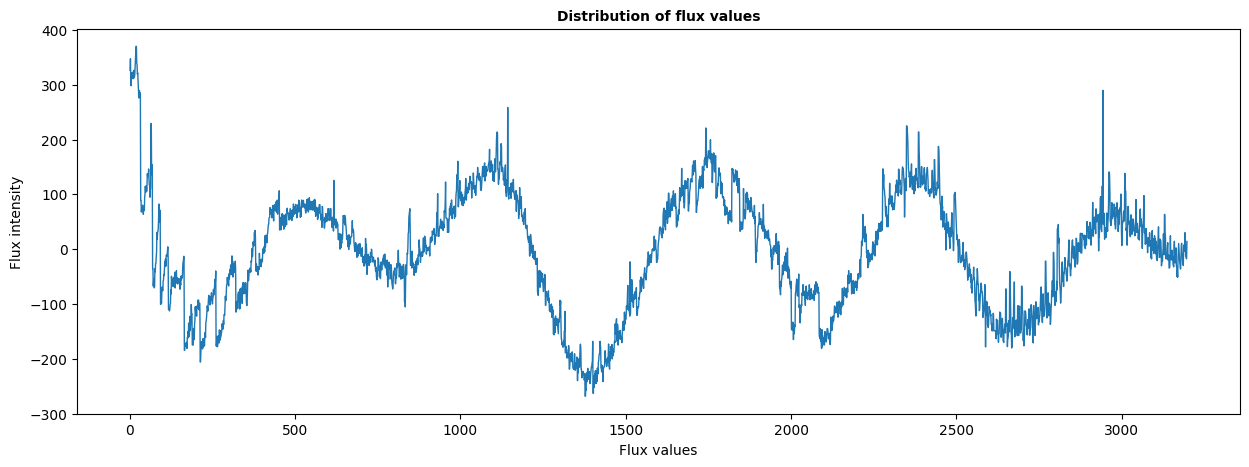

In [13]:
#Plotting a random star from the new df at iloc = 3
time = range(1,3198)
plt.figure(figsize = (15,5))
flux_values = newdf.iloc[3,:].values
plt.title('Distribution of flux values', fontsize=20, 
          font = 'sans serif', weight = 'bold', color = 'black')
plt.xlabel('Flux values')
plt.ylabel('Flux intensity')
plt.plot(time, flux_values, linewidth =1)
plt.show()

The dip in the flux valeus indicates the presence of an exoplanet orbiting the star. This is detected using the transit photometry method.

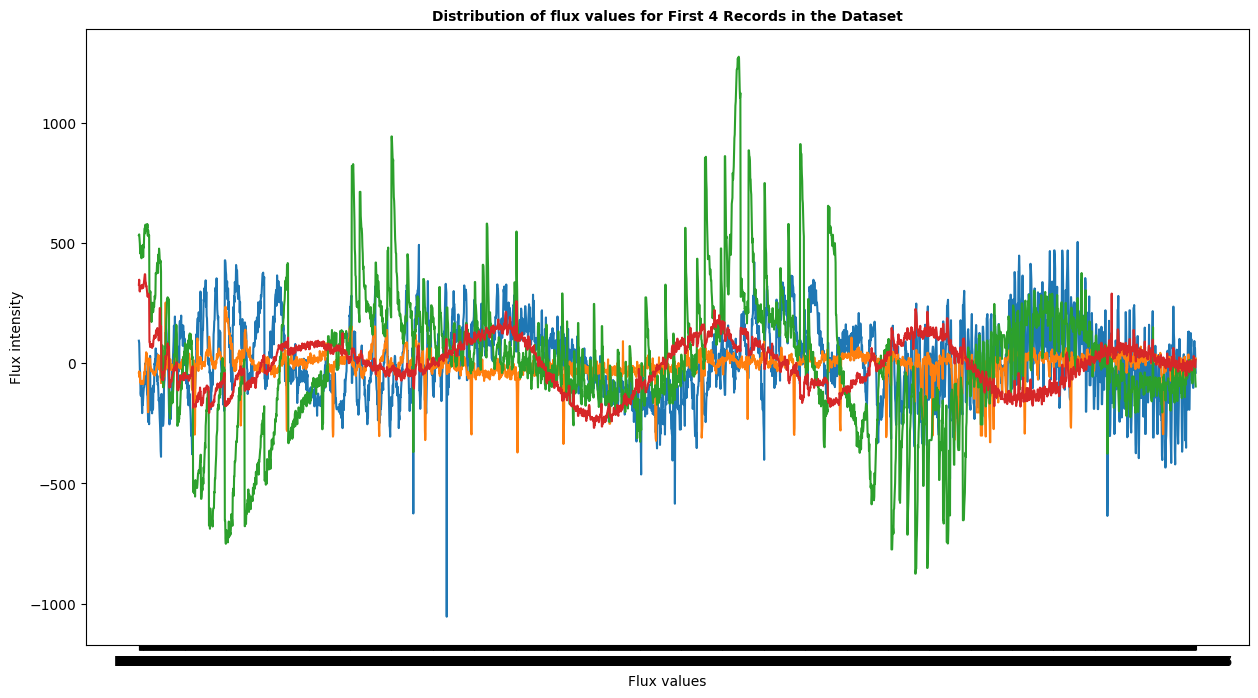

In [14]:
plt.figure(figsize=(15,8))
plt.title('Distribution of flux values for First 4 Records in the Dataset', fontsize=20, 
          font = 'sans serif', weight = 'bold', color = 'black')
plt.xlabel('Flux values')
plt.ylabel('Flux intensity')
plt.plot(newdf.iloc[0,])
plt.plot(newdf.iloc[1,])
plt.plot(newdf.iloc[2,])
plt.plot(newdf.iloc[3,])
plt.show()

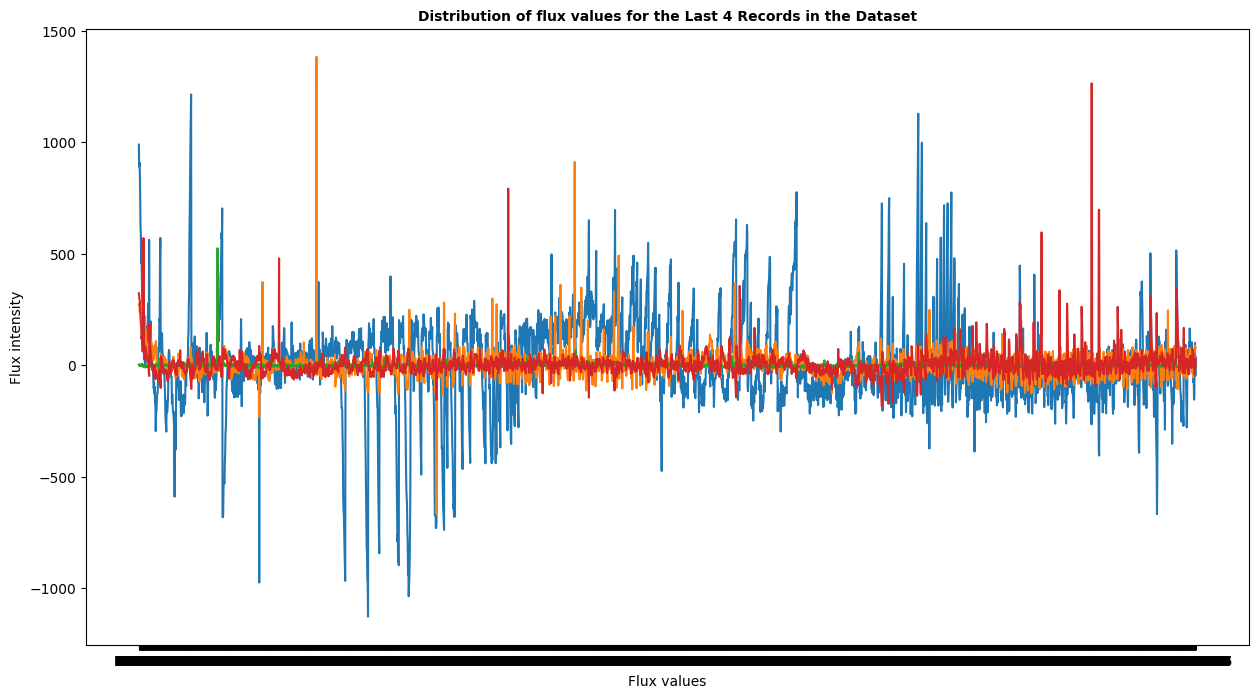

In [15]:
plt.figure(figsize=(15,8))
plt.title('Distribution of flux values for the Last 4 Records in the Dataset', fontsize=20, 
          font = 'sans serif', weight = 'bold', color = 'black')
plt.xlabel('Flux values')
plt.ylabel('Flux intensity')
plt.plot(newdf.iloc[5083,])
plt.plot(newdf.iloc[5084,])
plt.plot(newdf.iloc[5085,])
plt.plot(newdf.iloc[5086,])
plt.show()

#### Plotting Correlation Matrix

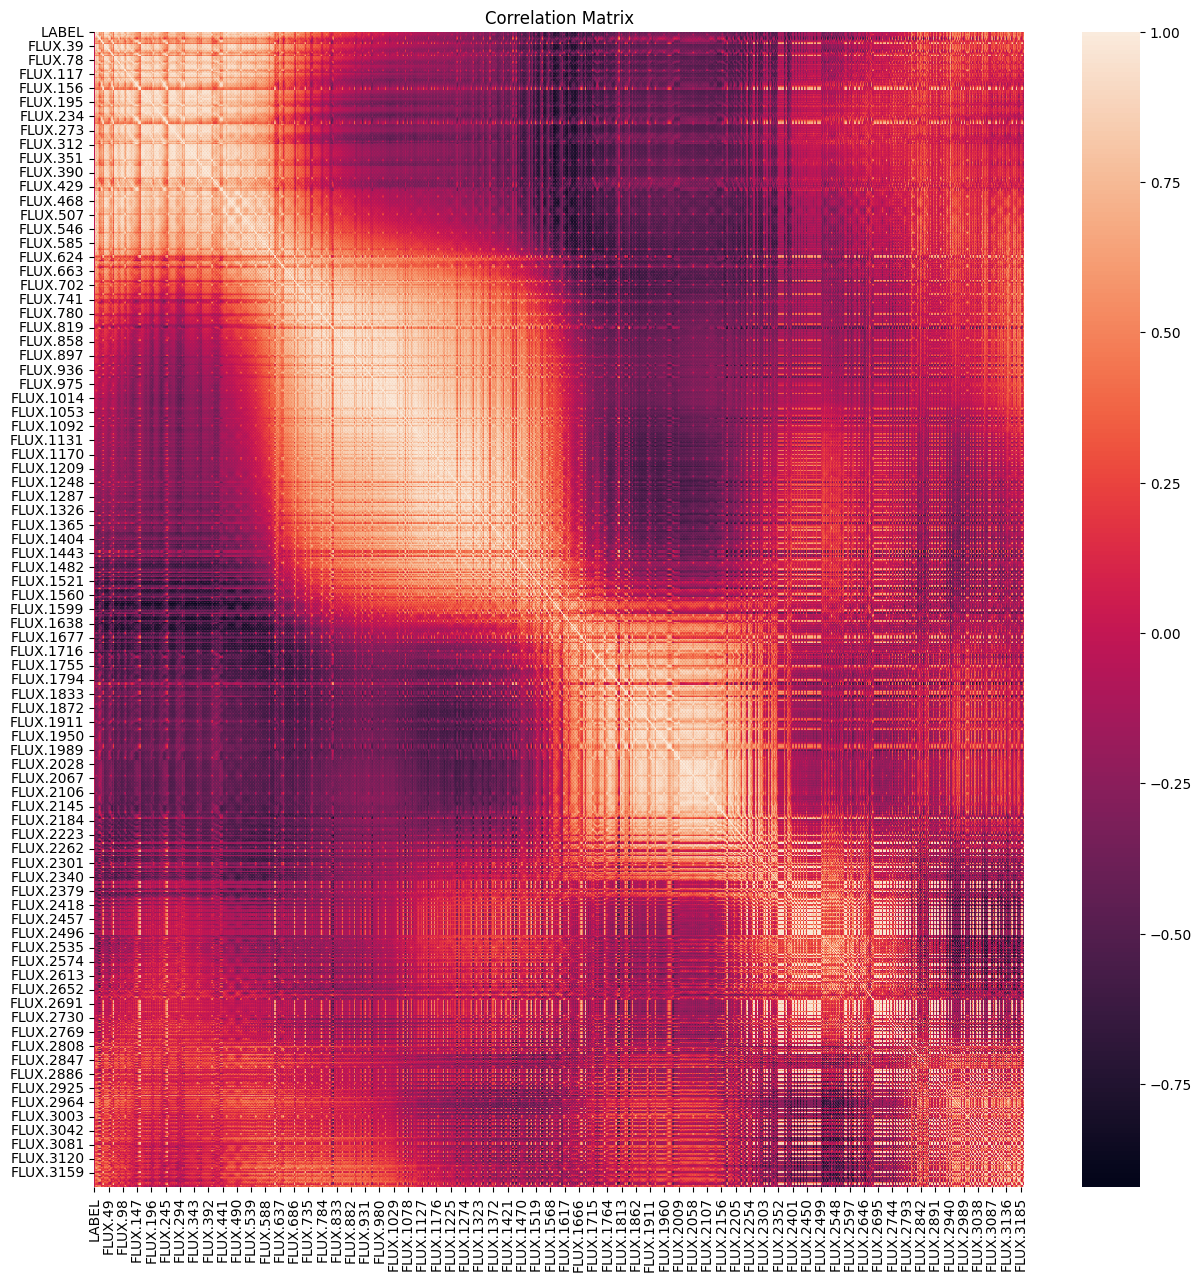

In [16]:
#Correlation matrix
plt.figure(figsize=(15,15))
sns.heatmap(traindf.corr())
plt.title('Correlation Matrix')
plt.show()

#### Detect Outliers using Boxplot

The box plot is suitable for comparing range and distribution for groups of numerical data. The box plot organizes large amounts of data, and visualizes outlier values.

In this dataset, we are plotting outliers using boxplots in the case of stars having no exoplanets. We will be removing the outliers from the dataset.

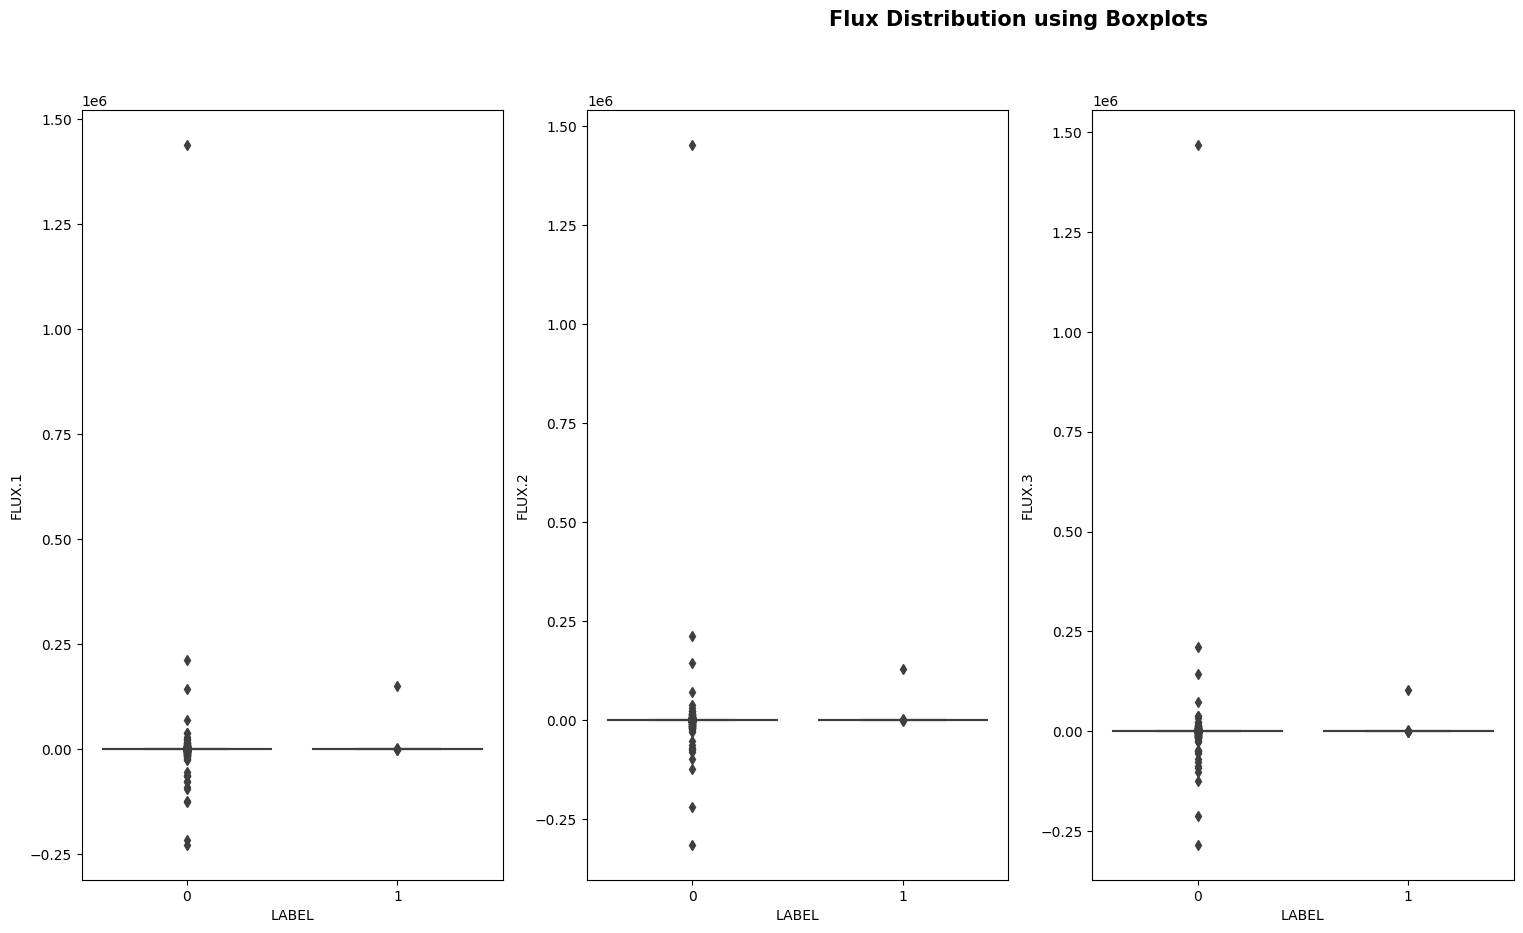

In [17]:
plt.figure(figsize = (25,10))
plt.suptitle("Flux Distribution using Boxplots",fontsize = 15,
          font = 'sans serif', weight = 'bold', color = 'black')
for i in range(1,4):
    plt.subplot(1,4,i)
    sns.boxplot(data = traindf, x = "LABEL", y = "FLUX." + str(i))
    #x and y will be the column names in the df

In [18]:
#Dropping outliers
traindf.drop( traindf[traindf['FLUX.2']> 0.25e6].index, axis = 0, inplace= True)
print("Outliers Dropped")

Outliers Dropped


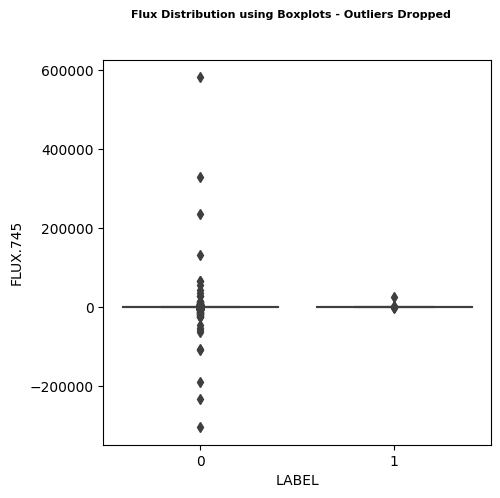

In [19]:
plt.figure(figsize = (5,5))
plt.suptitle("Flux Distribution using Boxplots - Outliers Dropped",fontsize = 8,
          font = 'sans serif', weight = 'bold', color = 'black')
sns.boxplot(data = traindf, x ="LABEL" , y = "FLUX." + str(np.random.randint(1000)))
plt.show()
#Extreme outliers present in the data is gone

#### Machine Learning
We will split the dataset into test and train sets. Since there is an imbalance in the dataset, we will use RandomOverSampling to balance the dataset. We will implement the KNN algorithm on the balanced and imbalanced dataset to predict the Accuracy Score of the model.

In [20]:
#Extracting the independent (x) and dependent (y) features from the traindf
x = traindf.drop(['LABEL'], axis =1)
y = traindf.LABEL

In [21]:
#x will represent the flux values and y represents the labels
x, y

(       FLUX.1   FLUX.2   FLUX.3   FLUX.4   FLUX.5   FLUX.6  FLUX.7   FLUX.8  \
 0       93.85    83.81    20.10   -26.98   -39.56  -124.71 -135.18   -96.27   
 1      -38.88   -33.83   -58.54   -40.09   -79.31   -72.81  -86.55   -85.33   
 2      532.64   535.92   513.73   496.92   456.45   466.00  464.50   486.39   
 3      326.52   347.39   302.35   298.13   317.74   312.70  322.33   311.31   
 4    -1107.21 -1112.59 -1118.95 -1095.10 -1057.55 -1034.48 -998.34 -1022.71   
 ...       ...      ...      ...      ...      ...      ...     ...      ...   
 5082   -91.91   -92.97   -78.76   -97.33   -68.00   -68.24  -75.48   -49.25   
 5083   989.75   891.01   908.53   851.83   755.11   615.78  595.77   458.87   
 5084   273.39   278.00   261.73   236.99   280.73   264.90  252.92   254.88   
 5085     3.82     2.09    -3.29    -2.88     1.66    -0.75    3.85    -0.03   
 5086   323.28   306.36   293.16   287.67   249.89   218.30  188.86   178.93   
 
       FLUX.9  FLUX.10  ...  FLUX.3188

In [22]:
#Splitting this data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
#testsize 0.3 means 30% for testing purpose and remaining 70% for training purpose

#### Feature Scaling

In [23]:
#Feature Scaling
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.fit_transform(x_test)

In [24]:
np.min(x_train_sc), np.max(x_train_sc)

(-57.10397981586141, 59.4602261831905)

In [25]:
np.min(x_test_sc), np.max(x_test_sc)

(-38.933246951307595, 38.9722064006283)

#### Using KNN Classifier Model

Validation accuracy of KNN : 0.991480996068152

Classification report of KNN :               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1513
           1       0.00      0.00      0.00        13

    accuracy                           0.99      1526
   macro avg       0.50      0.50      0.50      1526
weighted avg       0.98      0.99      0.99      1526



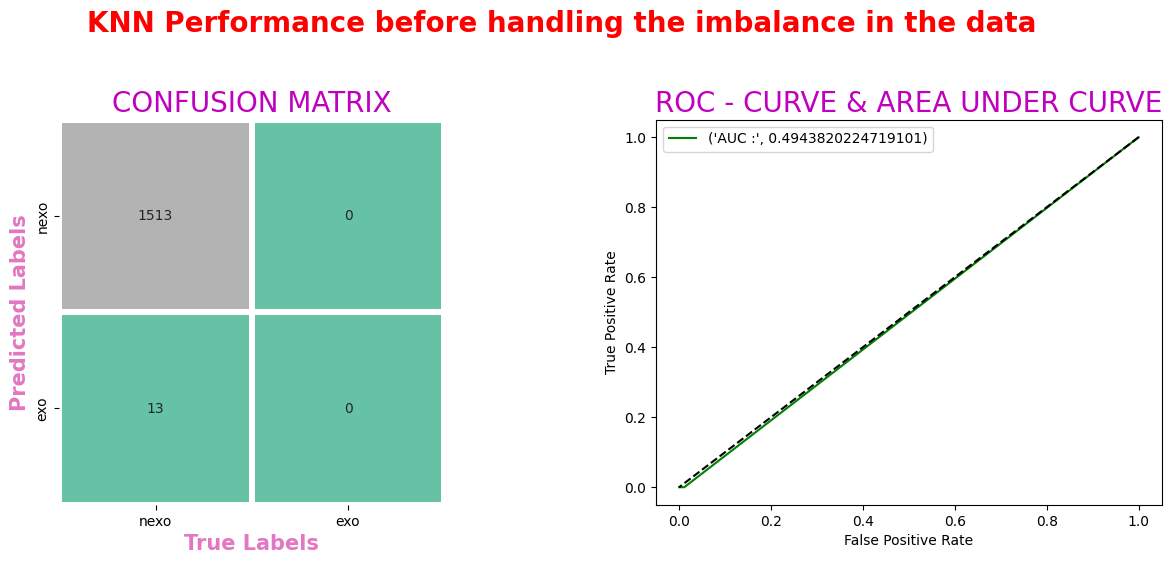

In [26]:
#Fitting the KNN classifier model on the train data
#Choosing k=5
knn_classifier = KNC(n_neighbors = 5, metric = 'minkowski', p=2)

#Fitting the model
knn_classifier.fit(x_train_sc, y_train)

#Predict
y_pred = knn_classifier.predict(x_test_sc)

#Results
print("Validation accuracy of KNN :" , accuracy_score(y_test, y_pred))
print("")
print("Classification report of KNN :", classification_report(y_test, y_pred))

#Confusion matrix
plt.figure(figsize = (15,11))
plt.subplots_adjust(wspace = 0.3)
plt.suptitle("KNN Performance before handling the imbalance in the data", color = 'red', 
            fontsize = 20, font = 'sans serif', weight = 'bold')
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, cmap = 'Set2', fmt= "d",
            linewidth = 3, cbar = False, xticklabels = ['nexo', 'exo'], 
            yticklabels = ['nexo','exo'], square = True
            )
plt.xlabel("True Labels", fontsize = 15, color = "tab:pink", weight = "bold")
plt.ylabel("Predicted Labels", fontsize = 15, color = "tab:pink", weight = "bold")
plt.title("CONFUSION MATRIX", fontsize = 20, color = 'm')

#ROC Curve and Area under the curve plotting
pred_prob = knn_classifier.predict_proba(x_test_sc)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, pred_prob)
plt.subplot(222)
plt.plot(fpr, tpr, label = ("AUC :", auc(fpr, tpr)), color = "g")
plt.plot([1,0],[1,0],"k--")
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC - CURVE & AREA UNDER CURVE", fontsize = 20, color = 'm')
plt.show()

Handling the imbalance in the data and then applying KNN
Using RandomOverSampler method here
This is over sampling by duplicating some of the original samples of the minority class

In [27]:
#Handling the imbalanced data using imblearn
ros = RandomOverSampler()
x_ros, y_ros = ros.fit_resample(x,y)

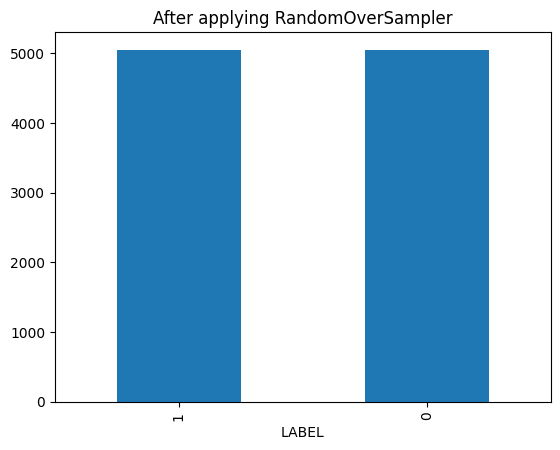

In [28]:
y_ros.value_counts().plot(kind = "bar", title = "After applying RandomOverSampler")
plt.show()

In [29]:
#Counting sample values before and after sampling
print(f"Before ROS:- {Counter(y)} \nAfter ROS:- {Counter(y_ros)}")

Before ROS:- Counter({0: 5049, 1: 37}) 
After ROS:- Counter({1: 5049, 0: 5049})


Validation accuracy of KNN : 0.9953795379537954

Classification report of KNN :               precision    recall  f1-score   support

           0       1.00      0.99      1.00      1512
           1       0.99      1.00      1.00      1518

    accuracy                           1.00      3030
   macro avg       1.00      1.00      1.00      3030
weighted avg       1.00      1.00      1.00      3030



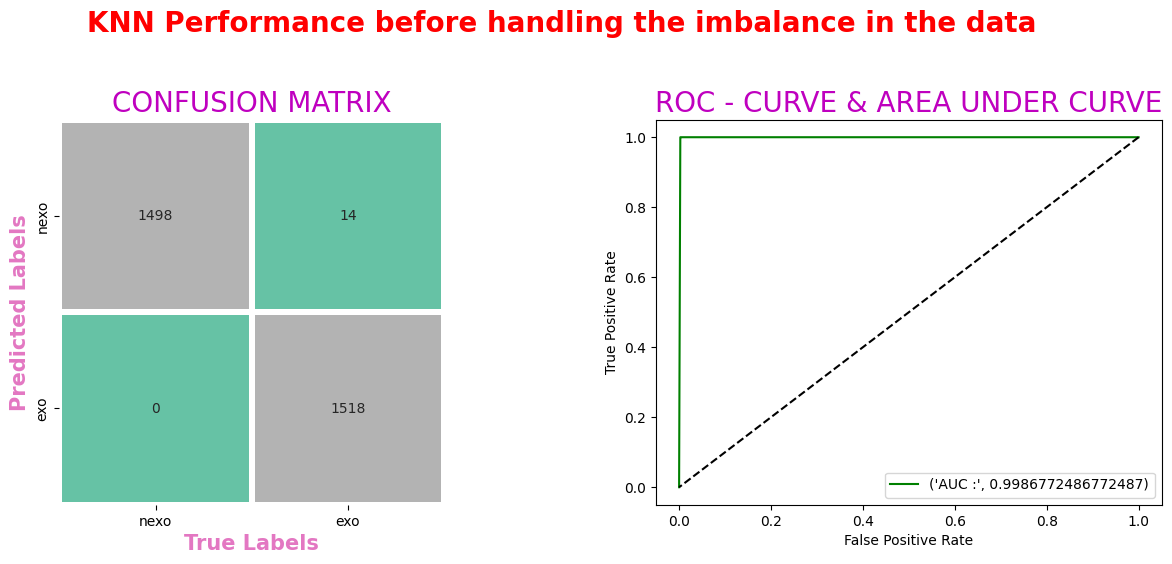

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size = 0.3, random_state = 0)
x_train_sc = sc.fit_transform(x_train)
#just transform is important here
x_test_sc = sc.transform(x_test)

#Fitting the KNN classifier model on the train data
#Choosing k=5
knn_classifier = KNC(n_neighbors = 5, metric = 'minkowski', p=2)

#Fitting the model
knn_classifier.fit(x_train_sc, y_train)

#Predict
y_pred = knn_classifier.predict(x_test_sc)

#Results
print("Validation accuracy of KNN :" , accuracy_score(y_test, y_pred))
print("")
print("Classification report of KNN :", classification_report(y_test, y_pred))

#Confusion matrix
plt.figure(figsize = (15,11))
plt.subplots_adjust(wspace = 0.3)
plt.suptitle("KNN Performance before handling the imbalance in the data", color = 'red', 
            fontsize = 20, font = 'sans serif', weight = 'bold')
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, cmap = 'Set2', fmt= "d",
            linewidth = 3, cbar = False, xticklabels = ['nexo', 'exo'], 
            yticklabels = ['nexo','exo'], square = True
            )
plt.xlabel("True Labels", fontsize = 15, color = "tab:pink", weight = "bold")
plt.ylabel("Predicted Labels", fontsize = 15, color = "tab:pink", weight = "bold")
plt.title("CONFUSION MATRIX", fontsize = 20, color = 'm')

#ROC Curve and Area under the curve plotting
pred_prob = knn_classifier.predict_proba(x_test_sc)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, pred_prob)
plt.subplot(222)
plt.plot(fpr, tpr, label = ("AUC :", auc(fpr, tpr)), color = "g")
plt.plot([1,0],[1,0],"k--")
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC - CURVE & AREA UNDER CURVE", fontsize = 20, color = 'm')
plt.show()

Optimize the model by choosing the best value of K

Text(0, 0.5, 'Error Rate')

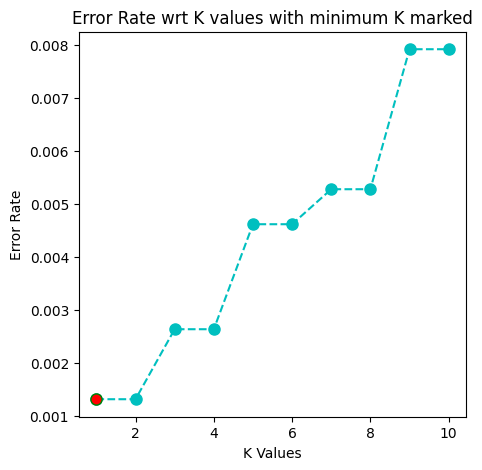

In [31]:
#Choosing K value with minimal error
err_rate = []

for K in range(1,11):
    knnc = KNC(n_neighbors = K)
    knnc.fit(x_train_sc,y_train)
    pred = knnc.predict(x_test_sc)
    err_rate.append(np.mean(pred!=y_test))
    
arg,val = err_rate.index(min(err_rate)), min(err_rate)

plt.figure(figsize= (5,5))
plt.plot(range(1,11), err_rate, 'co--', markersize = 8)
plt.plot(arg+1, val, marker = 'o', markersize = 8, markerfacecolor = 'r', markeredgecolor = 'g')
plt.title("Error Rate wrt K values with minimum K marked")
plt.xlabel("K Values")
plt.ylabel("Error Rate")

From the above, we got that the best value of K is either 1 or 2

Validation accuracy of KNN : 0.9986798679867986

Classification report of KNN :               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1512
           1       1.00      1.00      1.00      1518

    accuracy                           1.00      3030
   macro avg       1.00      1.00      1.00      3030
weighted avg       1.00      1.00      1.00      3030



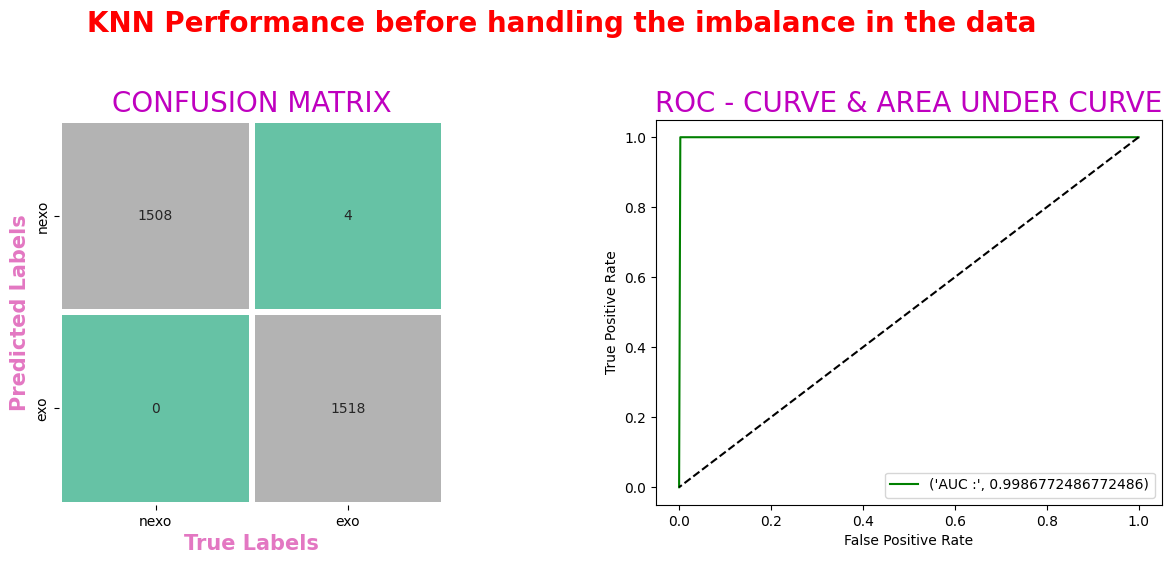

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size = 0.3, random_state = 0)
x_train_sc = sc.fit_transform(x_train)
#just transform is important here
x_test_sc = sc.transform(x_test)

#Fitting the KNN classifier model on the train data
#Choosing k=1 the best possible value
knn_classifier = KNC(n_neighbors = 1, metric = 'minkowski', p=2)

#Fitting the model
knn_classifier.fit(x_train_sc, y_train)

#Predict
y_pred = knn_classifier.predict(x_test_sc)

#Results
print("Validation accuracy of KNN :" , accuracy_score(y_test, y_pred))
print("")
print("Classification report of KNN :", classification_report(y_test, y_pred))

#Confusion matrix
plt.figure(figsize = (15,11))
plt.subplots_adjust(wspace = 0.3)
plt.suptitle("KNN Performance before handling the imbalance in the data", color = 'red', 
            fontsize = 20, font = 'sans serif', weight = 'bold')
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, cmap = 'Set2', fmt= "d",
            linewidth = 3, cbar = False, xticklabels = ['nexo', 'exo'], 
            yticklabels = ['nexo','exo'], square = True
            )
plt.xlabel("True Labels", fontsize = 15, color = "tab:pink", weight = "bold")
plt.ylabel("Predicted Labels", fontsize = 15, color = "tab:pink", weight = "bold")
plt.title("CONFUSION MATRIX", fontsize = 20, color = 'm')

#ROC Curve and Area under the curve plotting
pred_prob = knn_classifier.predict_proba(x_test_sc)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, pred_prob)
plt.subplot(222)
plt.plot(fpr, tpr, label = ("AUC :", auc(fpr, tpr)), color = "g")
plt.plot([1,0],[1,0],"k--")
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC - CURVE & AREA UNDER CURVE", fontsize = 20, color = 'm')
plt.show()